In [1]:
import numpy as np
import skimage.io as io
import os
import matplotlib.pyplot as plt

In [4]:
# Constants
# DIC_path = 'data/DIC.tif' # DIC not required
GFP_path = 'data/P1_GFP.tif'
mCherry_path = 'data/P1_mCherry.tif'

In [5]:
# dic = io.imread(DIC_path) # DIC birght field, not required
gfp = io.imread(GFP_path) # green signal: G1, G2/M
mcy = io.imread(mCherry_path) # mCherry signal: S, G2/M

## Pre-processing

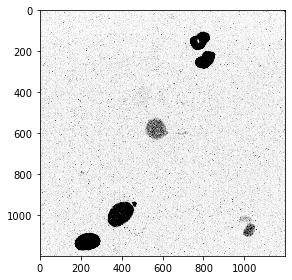

In [37]:
io.imshow(mcy_rscl[61,:,:], cmap='Greys')

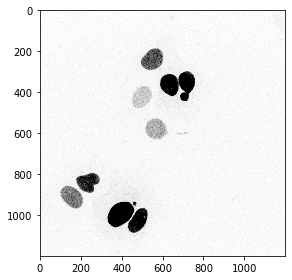

In [38]:
io.imshow(gfp_rscl[61,:,:], cmap='Greys')

In [32]:
# Enhance contrast: histogram equalization
import skimage.exposure as exposure
gfp_rscl = np.asarray(list(map(lambda x: exposure.rescale_intensity(gfp[x,:,:], 
                                                             in_range=tuple(np.percentile(gfp[x,:,:], (2, 98)))),
                        range(289))))
mcy_rscl = np.asarray(list(map(lambda x: exposure.rescale_intensity(mcy[x,:,:], 
                                                             in_range=tuple(np.percentile(mcy[x,:,:], (2, 98)))),
                        range(289))))

In [43]:
io.imsave('data/mcy_rscl.tif',mcy_rscl) # file output
io.imsave('data/gfp_rscl.tif',gfp_rscl)

## TO DO

In [9]:
# Gaussian filter
import skimage.filters as filters
combined_smoothed = np.asarray(list(map(lambda x: filters.gaussian(combined[x,:,:]), range(289))))

In [8]:
# Subtract background, slow, require skimage v0.18+
import skimage.restoration as restoration
t = restoration.rolling_ball(mcy[1,:,:],radius=100, num_threads=100)

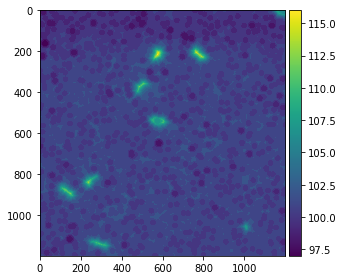

In [9]:
io.imshow(t)

## Thresholding

In [ ]:
# MaxEntropy (determine "offset" between auto-calculated threshold and optiumn threshold?)
# Otsu

## Post-processing

In [ ]:
# Open calculation
# Filter particles by size 
# Watershed

### TESTING

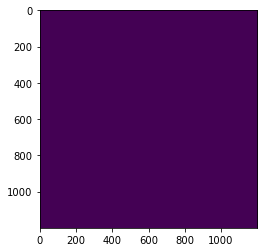

In [19]:
from skimage import feature
plt.imshow(feature.canny(mcy[1,:,:], sigma=10))

/Users/jefft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: scharr.tif is a low contrast image
  This is separate from the ipykernel package so we can avoid doing imports until


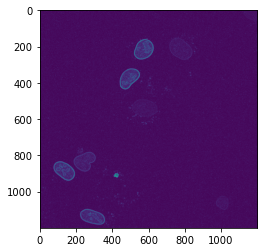

In [33]:
from skimage import filters
plt.imshow(filters.scharr(mcy[1,:,:]))
io.imsave('scharr.tif', filters.scharr(mcy[1,:,:]))